# VAL AND MOM IN THE SAME PLACE (Work-in-Progress)

[@sparshsah](https://github.com/sparshsah)

## setup

// [commit when I decided to start over](https://github.com/sparshsah/foggy-demo/blob/2aa977b/demo/finance/val-and-mom-in-the-same-place.ipynb)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from foggy_statslib import core as fc

In [190]:
def _get_px_bridge(p0: float = 1, p1: float = 1, t0: int = 0, span: int=10) -> pd.Series:
    domain = range(t0, t0+span)
    if p0 == p1:
        bridge = pd.Series(p0, index=domain)
    elif p0 < p1:
        bridge = pd.Series(np.exp(domain))
        # standardize: tare and scale
        bridge = bridge - bridge.min()
        bridge = bridge / (bridge.max() - bridge.min())
        # customize: scale and tare
        bridge = bridge * (p1 - p0)
        bridge = bridge + p0
    else:  # flip
        bridge = _get_px_bridge(p1, p0, t0=t0, span=span)
        bridge = bridge.iloc[::-1]
        bridge.index = domain
    return bridge

<AxesSubplot:>

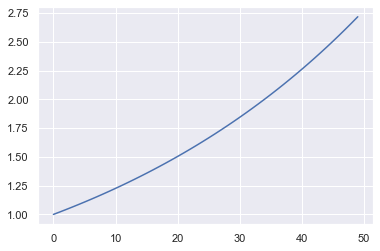

In [172]:
pd.Series(np.exp(np.linspace(0,1))).plot()

## Empirical Background: Value and Momentum Everywhere

["Value and Momentum Everywhere" (Asness-Moskowitz-Pedersen 2013)](https://www.aqr.com/Insights/Research/Journal-Article/Value-and-Momentum-Everywhere) was a seminal contribution to liquid-alternative relative-value factor investing, in both single-name and macro securities.

The following cross-sectional pricing anomalies (based on backward-looking observed returns) tend to stand up across geographies (e.g. emerging vs G10 vs currencies), asset classes (e.g. commodities vs government bonds), and time:
* Sign of spread return over `[0, -1 month]` reverses
* Sign of spread return over `[-2 months, -12 months]` continues
* Sign of spread return over `[-2 years, -5 years]` reverses

(Cliff himself often chides asset allocators for being "momentum investors at a value horizon", i.e. pulling money from underperforming managers and plowing it into outperforming managers based on trailing 3-year returns.)

Separately, the following directional (timeseries) pricing anomalies:
* Sign of own return over `[0, -1 week]` reverses
* Sign of own return over `[-2 weeks, -52 weeks]` continues
* Sign of own return over `[-2 years, -5 years]` reverses

## How is This Possible?

It initially blew my mind that these effects could coexist. Short-term returns reverse, but medium-term returns continue... isn't the medium term made up of just a bunch of short terms?? But here's an example:

In [170]:
# TODO(sparshsah): I might have to just do it (ugh) as an AR process... :(

## Theoretical Question: What's the Story?

I propose a behavioral story that is (a) self-consistent and (b) at least first-order consistent with stylized facts about market microstructure that could give rise to this effect.